In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\malil\Desktop\TUM-courses\ML Crowd Modeling and Simulation\Lab3\task4\output\task4_corridor_2020-11-25_12-46-18.18\SIRinformation.csv", sep=' ') 

In [10]:
data.head()

pedestrianId  simTime  groupId-PID5
0             1      0.0             0
1             2      0.0             0
2             3      0.0             0
3             4      0.0             0
4             5      0.0             0

In [9]:
def file_df_to_count_df(df,
                        ID_SUSCEPTIBLE=1,
                        ID_INFECTED=0):
    pedestrian_ids = df['pedestrianId'].unique()
    sim_times = df['simTime'].unique()
    group_counts = pd.DataFrame(columns=['simTime', 'group-s', 'group-i', 'group-r'])
    group_counts['simTime'] = sim_times
    group_counts['group-s'] = 0
    group_counts['group-i'] = 0
    group_counts['group-r'] = 0

    for pid in pedestrian_ids:
        simtime_group = df[df['pedestrianId'] == pid][['simTime', 'groupId-PID5']].values
        current_state = ID_SUSCEPTIBLE
        group_counts.loc[group_counts['simTime'] >= 0, 'group-s'] += 1
        for (st, g) in simtime_group:
            if g != current_state and g == ID_INFECTED and current_state == ID_SUSCEPTIBLE:
                current_state = g
                group_counts.loc[group_counts['simTime'] > st, 'group-s'] -= 1
                group_counts.loc[group_counts['simTime'] > st, 'group-i'] += 1
                break
    return group_counts

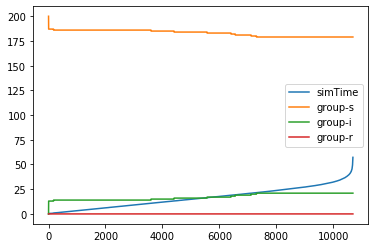

In [17]:
group_counts = file_df_to_count_df(data, ID_INFECTED=0, ID_SUSCEPTIBLE=1)
group_counts.plot()